## This file contains the initial data exploration of sea ice fraction and water surface temperature in northern Alaska

### It also contains exploration plots for individual NetCDF files

### data from source: https://disc.gsfc.nasa.gov/datasets/M2TMNXOCN_5.12.4/summary 

In [1]:
import xarray as xr

# Open the NetCDF file
ds = xr.open_dataset('/Users/casey/Desktop/blue-dot/data/raw/MERRA2_100.tavgM_2d_ocn_Nx.198101.nc4')
# Print the contents of the NetCDF file
print(ds)

# Access global attributes
print(ds.attrs)

# Access dimensions of the NetCDF file
print(ds.dims)

# Access data variables in the NetCDF file
print(ds.data_vars)

<xarray.Dataset>
Dimensions:         (lon: 576, lat: 361, time: 1)
Coordinates:
  * lon             (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * lat             (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * time            (time) datetime64[ns] 1981-01-01T00:30:00
Data variables: (12/42)
    EFLUXICE        (time, lat, lon) float32 ...
    EFLUXWTR        (time, lat, lon) float32 ...
    FRSEAICE        (time, lat, lon) float32 ...
    HFLUXICE        (time, lat, lon) float32 ...
    HFLUXWTR        (time, lat, lon) float32 ...
    LWGNTICE        (time, lat, lon) float32 ...
    ...              ...
    Var_TAUYICE     (time, lat, lon) float32 ...
    Var_TAUYWTR     (time, lat, lon) float32 ...
    Var_TSKINICE    (time, lat, lon) float32 ...
    Var_TSKINWTR    (time, lat, lon) float32 ...
    Var_U10M        (time, lat, lon) float32 ...
    Var_V10M        (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original

### View trend for 1980-2023 for one NetCDF file

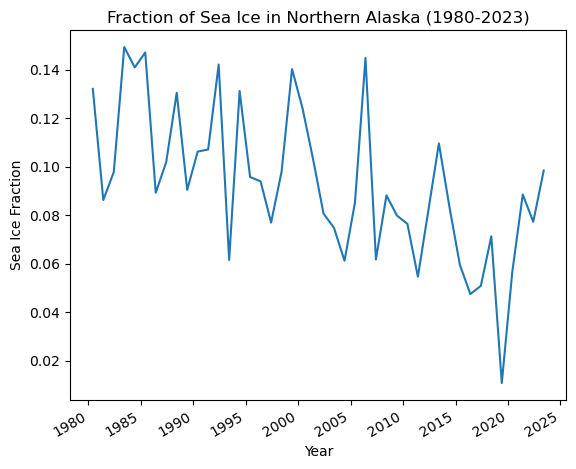

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import os

# Directory where your NetCDF files are stored
data_dir = '/Users/casey/Desktop/real_sea_ice_temp/june'

# List all NetCDF files
file_list = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.nc4')]

# Load and combine the NetCDF files
combined_ds = xr.open_mfdataset(file_list, combine='by_coords')

# Define the latitude and longitude bounds for Northern Alaska
lat_bounds = [64, 71]  # Northern Alaska latitude bounds
lon_bounds = [-168, -141]  # Northern Alaska longitude bounds

# Selecting the 'Var_TSKINICE' variable and the Northern Alaska region
variable = combined_ds['FRSEAICE'].sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# Averaging over the selected spatial dimensions
avg_variable = variable.mean(dim=['lat', 'lon'])

# Plotting
avg_variable.plot()
plt.title('Fraction of Sea Ice in Northern Alaska (1980-2023)')
plt.xlabel('Year')
plt.ylabel('Sea Ice Fraction')
plt.show()

# Close the dataset
combined_ds.close()

### Test out a 3d plot

In [2]:
import xarray as xr
import os
import plotly.graph_objects as go

# Directory where your NetCDF files are stored
data_dir = '/Users/casey/Desktop/real_sea_ice_temp/june'

# List all NetCDF files
file_list = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.nc4')]

# Load and combine the NetCDF files
combined_ds = xr.open_mfdataset(file_list, combine='by_coords')

# Define the latitude and longitude bounds for Northern Alaska
lat_bounds = [64, 71]  # Northern Alaska latitude bounds
lon_bounds = [-168, -141]  # Northern Alaska longitude bounds

# Selecting the 'Var_TSKINICE' variable and the Northern Alaska region
variable = combined_ds['FRSEAICE'].sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# Extract years and average sea ice fraction
years = combined_ds['time'].dt.year.values
avg_ice_fraction = variable.mean(dim=['lat', 'lon']).values

# Create 3D plot with Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=years,
    y=[6]*len(years),  # June is the 6th month
    z=avg_ice_fraction,
    mode='markers',
    marker=dict(
        size=8,
        color=avg_ice_fraction,  # set color to the ice fraction
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(
    title='Fraction of Sea Ice in Northern Alaska (1980-2023)',
    scene=dict(
        xaxis_title='Year',
        yaxis_title='Month (June)',
        zaxis_title='Average Sea Ice Fraction'
    )
)

fig.show()

# Close the dataset
combined_ds.close()


/Users/casey/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


### Test out a 3d plot attempting to combine fraction of sea ice with water temp on one plot

In [3]:
import xarray as xr
import os
import plotly.graph_objects as go

# Directory where your NetCDF files are stored
data_dir = '/Users/casey/Desktop/real_sea_ice_temp/june'

# List all NetCDF files
file_list = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.nc4')]

# Load and combine the NetCDF files
combined_ds = xr.open_mfdataset(file_list, combine='by_coords')

# Define the latitude and longitude bounds for Northern Alaska
lat_bounds = [64, 71]  # Northern Alaska latitude bounds
lon_bounds = [-168, -141]  # Northern Alaska longitude bounds

# Selecting the 'FRSEAICE' and 'Var_TSKINWTR' variables for the Northern Alaska region
sea_ice = combined_ds['FRSEAICE'].sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))
water_temp = combined_ds['Var_TSKINWTR'].sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# Averaging over the selected spatial dimensions
avg_sea_ice = sea_ice.mean(dim=['lat', 'lon'])
avg_water_temp = water_temp.mean(dim=['lat', 'lon'])

# Extract years
years = combined_ds['time'].dt.year.values

# Create 3D line plot with Plotly in dark mode
fig = go.Figure(data=[go.Scatter3d(
    x=years,
    y=avg_sea_ice.values,
    z=avg_water_temp.values,
    mode='lines',
    line=dict(
        width=6,
        color='blue'
    )
)])

fig.update_layout(
    title='Sea Ice Fraction and Water Temperature in Northern Alaska (1980-2023)',
    scene=dict(
        xaxis_title='Year',
        yaxis_title='Average Sea Ice Fraction',
        zaxis_title='Average Water Temperature (C)'
    ),
    template='plotly_dark'
)

fig.show()

# Close the dataset
combined_ds.close()


/Users/casey/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


### Attempting to plot sea ice frac and water temp onto one 2d plot

In [4]:
import xarray as xr
import os
import plotly.graph_objects as go

# Directory where your NetCDF files are stored
data_dir = '/Users/casey/Desktop/real_sea_ice_temp/june'

# List all NetCDF files
file_list = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.nc4')]

# Load and combine the NetCDF files
combined_ds = xr.open_mfdataset(file_list, combine='by_coords')

# Define the latitude and longitude bounds for Northern Alaska
lat_bounds = [64, 71]  # Northern Alaska latitude bounds
lon_bounds = [-168, -141]  # Northern Alaska longitude bounds

# Selecting the 'FRSEAICE' and 'Var_TSKINWTR' variables for the Northern Alaska region
sea_ice = combined_ds['FRSEAICE'].sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))
water_temp = combined_ds['Var_TSKINWTR'].sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# Averaging over the selected spatial dimensions
avg_sea_ice = sea_ice.mean(dim=['lat', 'lon']).values
avg_water_temp = water_temp.mean(dim=['lat', 'lon']).values

# Extract years
years = combined_ds['time'].dt.year.values

# Create 2D overlay plot with Plotly
fig = go.Figure()

# Adding Sea Ice line
fig.add_trace(go.Scatter(x=years, y=avg_sea_ice, mode='lines', name='Sea Ice Fraction'))

# Adding Water Temperature line
fig.add_trace(go.Scatter(x=years, y=avg_water_temp, mode='lines', name='Water Temperature (C)'))

# Update layout
fig.update_layout(
    title='Sea Ice Fraction and Water Temperature in Northern Alaska (1980-2023)',
    xaxis_title='Year',
    yaxis_title='Value',
    template='plotly_dark'
)

fig.show()

# Close the dataset
combined_ds.close()


/Users/casey/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



### Adding and scaling axes for both parameters

In [17]:
import xarray as xr
import plotly.graph_objects as go
import os
import plotly.graph_objects as go



# Directory where your NetCDF files are stored
data_dir = '/Users/casey/Desktop/real_sea_ice_temp/june'

# List all NetCDF files
file_list = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.nc4')]

# Load and combine the NetCDF files
combined_ds = xr.open_mfdataset(file_list, combine='by_coords')

# Define the latitude and longitude bounds for Northern Alaska
lat_bounds = [64, 71]  # Northern Alaska latitude bounds
lon_bounds = [-168, -141]  # Northern Alaska longitude bounds

# Selecting the 'FRSEAICE' and 'Var_TSKINWTR' variables for the Northern Alaska region
sea_ice = combined_ds['FRSEAICE'].sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))
water_temp = combined_ds['Var_TSKINWTR'].sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# Averaging over the selected spatial dimensions
avg_sea_ice = sea_ice.mean(dim=['lat', 'lon'])
avg_water_temp = water_temp.mean(dim=['lat', 'lon'])

# Convert water temperature from Kelvin to Celsius
avg_water_temp_celsius = avg_water_temp - 273.15

# Extract years
years = combined_ds['time'].dt.year.values

# Create Plotly plot with dual y-axes in dark mode
fig = go.Figure()

# Add water temperature trace
fig.add_trace(go.Scatter(
    x=years,
    y=avg_water_temp_celsius,
    name='Water Temperature (°C)',
    mode='lines',
    line=dict(color='blue')
))

# Add sea ice fraction trace
fig.add_trace(go.Scatter(
    x=years,
    y=avg_sea_ice,
    name='Sea Ice Fraction',
    mode='lines',
    line=dict(color='red'),
    yaxis='y2'
))

# Update layout for dark mode and grid
fig.update_layout(
    title='Sea Ice Fraction and Water Temperature in Northern Alaska (1980-2023)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Average Water Temperature (°C)', side='left', showgrid=True),
    yaxis2=dict(title='Average Sea Ice Fraction', side='right', overlaying='y', showgrid=False),
    template='plotly_dark',
    plot_bgcolor='rgba(0,0,0,0)',
    #gridcolor='gray'
)

fig.show()


# Close the dataset
combined_ds.close()


/Users/casey/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



### Proof of concept for adding map of Alaska to plot

In [10]:
import xarray as xr
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

# Directory where your NetCDF files are stored
data_dir = '/Users/casey/Desktop/real_sea_ice_temp/june'

# List all NetCDF files
file_list = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.nc4')]

# Load and combine the NetCDF files
combined_ds = xr.open_mfdataset(file_list, combine='by_coords')

# Define the latitude and longitude bounds for Northern Alaska
lat_bounds = [64, 71]  # Northern Alaska latitude bounds
lon_bounds = [-168, -141]  # Northern Alaska longitude bounds

# Selecting the 'FRSEAICE' and 'Var_TSKINWTR' variables for the Northern Alaska region
sea_ice = combined_ds['FRSEAICE'].sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))
water_temp = combined_ds['Var_TSKINWTR'].sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# Averaging over the selected spatial dimensions
avg_sea_ice = sea_ice.mean(dim=['lat', 'lon'])
avg_water_temp = water_temp.mean(dim=['lat', 'lon'])


avg_water_temp_celsius = avg_water_temp

# Extract years
years = combined_ds['time'].dt.year.values

# Create Plotly subplot
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Sea Ice Fraction and Water Temperature in Northern Alaska (1980-2023)", "Location of Northern Alaska"),
    row_heights=[0.7, 0.3],  # Adjust as needed
    vertical_spacing=0.02,
    specs=[[{"type": "scatter"}], [{"type": "scattergeo"}]]
)

# Add water temperature trace
fig.add_trace(
    go.Scatter(
        x=years,
        y=avg_water_temp_celsius,
        name='Water Temperature (°C)',
        mode='lines',
        line=dict(color='blue')
    ),
    row=1, col=1
)

# Add sea ice fraction trace
fig.add_trace(
    go.Scatter(
        x=years,
        y=avg_sea_ice,
        name='Sea Ice Fraction',
        mode='lines',
        line=dict(color='red'),
        yaxis='y2'
    ),
    row=1, col=1
)

# Add Alaska map trace
fig.add_trace(
    go.Scattergeo(
        lon=[(lon_bounds[0] + lon_bounds[1]) / 2],
        lat=[(lat_bounds[0] + lat_bounds[1]) / 2],
        mode='markers',
        marker=dict(size=10, color='green'),
        showlegend=False,
        text='Northern Alaska'
    ),
    row=2, col=1
)

# Update layout for dark mode, grid, and geo subplot
fig.update_layout(
    template='plotly_dark',
    plot_bgcolor='rgba(0,0,0,0)',
    #gridcolor='gray'
)

fig.update_geos(
    row=2, col=1,
    visible=True, resolution=50,
    showcountries=True, countrycolor="RebeccaPurple",
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="LightGreen",
    lataxis={'range': lat_bounds},
    lonaxis={'range': lon_bounds}
)

fig.update_yaxes(title_text="Average Water Temperature (°C)", row=1, col=1)
fig.update_yaxes(title_text="Average Sea Ice Fraction", row=1, col=1, secondary_y=True)

fig.show()

# Close the dataset
combined_ds.close()


/Users/casey/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



### Reattempt plotting Alaska

In [12]:
import xarray as xr
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

# Directory where your NetCDF files are stored
data_dir = '/Users/casey/Desktop/real_sea_ice_temp/june'

# List all NetCDF files
file_list = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.nc4')]

# Load and combine the NetCDF files
combined_ds = xr.open_mfdataset(file_list, combine='by_coords')

# Define the latitude and longitude bounds for Northern Alaska
lat_bounds = [64, 71]
lon_bounds = [-168, -141]

# Selecting variables for Northern Alaska region
sea_ice = combined_ds['FRSEAICE'].sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))
water_temp = combined_ds['Var_TSKINWTR'].sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# Averaging over selected spatial dimensions
avg_sea_ice = sea_ice.mean(dim=['lat', 'lon'])
avg_water_temp = water_temp.mean(dim=['lat', 'lon'])

# Convert water temperature from Kelvin to Celsius
avg_water_temp_celsius = avg_water_temp 

# Extract years
years = combined_ds['time'].dt.year.values

# Create Plotly subplot
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.8, 0.2],
    specs=[[{"type": "scatter"}, {"type": "scattergeo", "rowspan": 1}]],
    horizontal_spacing=0.02
)

# Add water temperature trace (left y-axis)
fig.add_trace(
    go.Scatter(x=years, y=avg_water_temp_celsius, name='Water Temp (°C)', mode='lines', line=dict(color='blue')),
    row=1, col=1
)

# Add sea ice fraction trace (right y-axis)
fig.add_trace(
    go.Scatter(x=years, y=avg_sea_ice, name='Sea Ice Fraction', mode='lines', line=dict(color='red'), yaxis='y2'),
    row=1, col=1
)

# Add Alaska map trace
fig.add_trace(
    go.Scattergeo(lon=[(lon_bounds[0] + lon_bounds[1]) / 2], lat=[(lat_bounds[0] + lat_bounds[1]) / 2],
                  mode='markers', marker=dict(size=10, color='green'), showlegend=False, text='Northern Alaska'),
    row=1, col=2
)

# Update layout for dark mode and grid
fig.update_layout(template='plotly_dark', title='Sea Ice and Water Temperature in Northern Alaska')

# Update geo subplot for Alaska
fig.update_geos(
    visible=True, resolution=50, scope='north america',
    showcountries=True, countrycolor="RebeccaPurple",
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="LightGreen",
    lonaxis={'range': [-170, -130]},
    lataxis={'range': [50, 75]},
    row=1, col=2
)

# Update axes
fig.update_yaxes(title_text='Water Temp (°C)', side='left', showgrid=True, row=1, col=1)
fig.update_yaxes(title_text='Sea Ice Fraction', side='right', overlaying='y', showgrid=False, row=1, col=1, secondary_y=True)

fig.show()

# Close the dataset
combined_ds.close()


/Users/casey/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



## End of file containing initial ideas. Move to 02-cmm-initial-plotting for next brainstorming steps